## Assignment 5

In this assignment the 20 newsgroup dataset is used.  
There are around 18000 posts on 20 different topicks. The data are also split in train and test subsets. The split is done based on a specific date. All messages before that date belong to the train set and the rest on the test set.  

Goal of the assignment is to use the Naive Bayes classifier to classift the documents to their specific topic.  
We are also going to be making the assumption that the data follow a multinomial distribution.  

_Multinomial Naive Bayes is suitable for classification of discrete features, such as word counts in the case of text classification._

In [185]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk import RegexpTokenizer, WordNetLemmatizer

In scikit-learn official documentation of the dataset, it is [recommended](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) to remove features like header, footers and quotes (newsgroup related metadata) when working with a Naive Bayes classifier, as the classifier overfits on these features and does not learn actual topic-related features.


In [186]:
X_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
X_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [187]:
news_topics = {i:x for i,x in enumerate(X_train.target_names)}

In [188]:
print(f'The target topics of the data are: \n{", ".join(X_train.target_names)}. \n')
print(f'Train data consist of {X_train.filenames.shape[0]} entries and test data of {X_test.filenames.shape[0]} entries.')
#Counter(X_train.target)
print('Also there is approximate the same number of examples across all diferent topics.')

The target topics of the data are: 
alt.atheism, comp.graphics, comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, comp.windows.x, misc.forsale, rec.autos, rec.motorcycles, rec.sport.baseball, rec.sport.hockey, sci.crypt, sci.electronics, sci.med, sci.space, soc.religion.christian, talk.politics.guns, talk.politics.mideast, talk.politics.misc, talk.religion.misc. 

Train data consist of 11314 entries and test data of 7532 entries.
Also there is approximate the same number of examples across all diferent topics.


In [189]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

# fit the model
text_clf.fit(X_train.data, X_train.target)

# make predictions
predictions = text_clf.predict(X_test.data)

print(f"Weighted F1 classification score is: {round(f1_score(X_test.target, predictions, average='weighted')*100, 2)}%")

Weighted F1 classification score is: 60.54%


In [190]:
clf_report = classification_report(X_test.target, predictions, target_names=X_test.target_names, output_dict=True)

In [191]:
pd.DataFrame(clf_report)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,...,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc,accuracy,macro avg,weighted avg
precision,0.814815,0.721557,0.702128,0.553471,0.811847,0.827195,0.862620,0.820669,0.889286,0.948276,...,0.859589,0.837838,0.220468,0.587912,0.853896,0.806452,0.500000,0.606213,0.722197,0.724466
recall,0.068966,0.619537,0.502538,0.752551,0.605195,0.739241,0.692308,0.681818,0.625628,0.692695,...,0.633838,0.629442,0.947236,0.587912,0.699468,0.080645,0.003984,0.606213,0.584285,0.606213
f1-score,0.127168,0.666667,0.585799,0.637838,0.693452,0.780749,0.768137,0.744828,0.734513,0.800582,...,0.729651,0.718841,0.357685,0.587912,0.769006,0.146628,0.007905,0.606213,0.585435,0.605355
support,319.000000,389.000000,394.000000,392.000000,385.000000,395.000000,390.000000,396.000000,398.000000,397.000000,...,396.000000,394.000000,398.000000,364.000000,376.000000,310.000000,251.000000,0.606213,7532.000000,7532.000000


In [192]:
confusion_data = confusion_matrix(X_test.target, predictions)

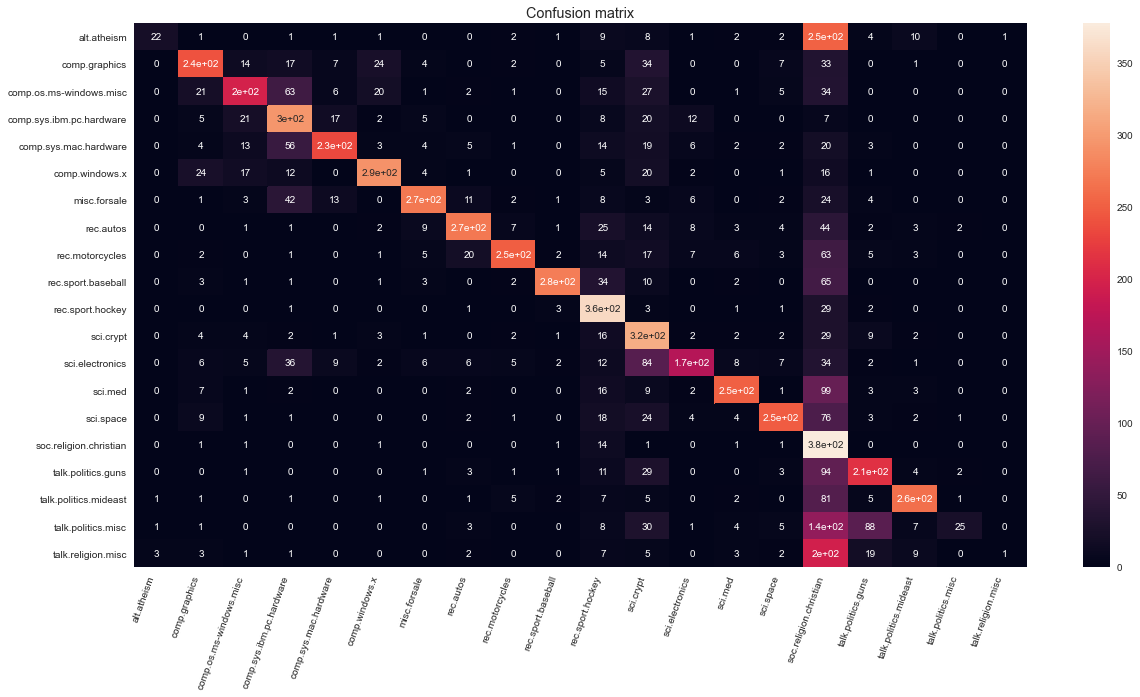

In [193]:
labels = X_test.target_names
plt.figure(figsize=(20,10))
ax = sns.heatmap(confusion_data, annot=True, annot_kws={'size':10})
ax.set_xticklabels(labels, rotation=70, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')
plt.title('Confusion matrix', fontsize='large')
plt.show()

In [194]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer(use_idf=False)),
                     ('clf', MultinomialNB())
                    ])

# fit the model
text_clf.fit(X_train.data, X_train.target)

# make predictions
predictions = text_clf.predict(X_test.data)

print(f"Weighted F1 classification score is: {round(f1_score(X_test.target, predictions, average='weighted')*100, 2)}%")

Weighted F1 classification score is: 48.99%


In [195]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()),
                     ('clf', MultinomialNB())
                    ])

# fit the model
text_clf.fit(X_train.data, X_train.target)

# make predictions
predictions = text_clf.predict(X_test.data)

print(f"Weighted F1 classification score is: {round(f1_score(X_test.target, predictions, average='weighted')*100, 2)}%")

Weighted F1 classification score is: 52.56%


To improve the model's score we can try some text preprocessing techniques

1. Split the text into individual words ("tokenization")
2. Word lemmatization


In [196]:
X_train_text = pd.DataFrame(X_train.data)
X_train_text.columns=['news']

tokenizer = RegexpTokenizer(r'\w+')
X_train_text['processed_text'] = X_train_text['news'].map(lambda x: tokenizer.tokenize(x))

lemmatizer = WordNetLemmatizer()
X_train_text['processed_text'] = X_train_text['processed_text'].map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [197]:
X_train_text.head()

,news,processed_text
0,I was wondering if anyone out there could enli...,I wa wondering if anyone out there could enlig...
1,A fair number of brave souls who upgraded thei...,A fair number of brave soul who upgraded their...
2,"well folks, my mac plus finally gave up the gh...",well folk my mac plus finally gave up the ghos...
3,\nDo you have Weitek's address/phone number? ...,Do you have Weitek s address phone number I d ...
4,"From article <C5owCB.n3p@world.std.com>, by to...",From article C5owCB n3p world std com by tomba...


In [198]:
X_test_text = pd.DataFrame(X_test.data)
X_test_text.columns=['news']

X_test_text['processed_text'] = X_test_text['news'].map(lambda x: tokenizer.tokenize(x))
X_test_text['processed_text'] = X_test_text['processed_text'].map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [199]:
text_clf = Pipeline([('tfidf_vectorizer', TfidfVectorizer()),
                     ('clf', MultinomialNB())
                    ])

# fit the model
text_clf.fit(X_train_text['processed_text'], X_train.target)

# make predictions
predictions = text_clf.predict(X_test_text['processed_text'])

print(f"Weighted F1 classification score is: {round(f1_score(X_test.target, predictions, average='weighted')*100, 2)}%")

Weighted F1 classification score is: 60.97%


In [200]:
2269298-2247132

22166

In [201]:
from nltk.stem import WordNetLemmatizer